In [2]:
# 3.1 导库，获取数据
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
#其实日常在导库的时候，并不是一次性能够知道我们要用的所有库的。通常都是在建模过程中逐渐导入需要的库。

In [3]:
data = pd.read_csv(r"H:\学习小分队\机器学习\sklearn学习_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\rankingcard.csv",index_col=0)

In [4]:
#3.2 探索数据与数据预处理
#观察数据类型
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#观察数据结构
data.shape

(150000, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
#3.2.1 去除重复值 并覆盖源数据
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [9]:
#删除之后千万不要忘记，恢复索引
data.index = range(data.shape[0])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [11]:
#3.2.2 填补缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [12]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [13]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [14]:
# 使用均值填补“家属人数”
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)

In [15]:
#如果你选择的是删除那些缺失了2.5%的特征，千万记得恢复索引哟~
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [16]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [17]:
# 用随机森林填补缺失值
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """

    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [18]:
X = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"] 
X.shape

(149391, 10)

In [19]:
#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

In [20]:
y_pred.shape

(29221,)

In [21]:
#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"].shape

(29221,)

In [22]:
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [24]:
#3.2.3 描述性统计处理异常值
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5423.427592,13243.700674,0.0,0.0,0.170000,1800.000000,4417.363810,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [25]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()

1

In [26]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]

In [27]:
data.shape

(149390, 11)

In [28]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [29]:
#有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90] 
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [30]:
#3.2.5 样本不均衡问题
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [31]:
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [32]:
n_sample = X.shape[0]

In [33]:
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

In [34]:
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


In [35]:
#如果报错，就在prompt安装：pip install imblearn
import imblearn
#imblearn是专门用来处理不平衡数据集的库，在处理样本不均衡问题中性能高过sklearn很多
#imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn用法相似

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_resample(X,y)

In [38]:
n_sample_ = X.shape[0]

In [39]:
X.shape

(278584, 10)

In [40]:
y

0         1
1         0
2         0
3         0
4         0
         ..
278579    1
278580    1
278581    1
278582    1
278583    1
Name: SeriousDlqin2yrs, Length: 278584, dtype: int64

In [41]:
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [42]:
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]

In [43]:
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


In [44]:
# 3.2.6 分训练集和测试集
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X) 
y = pd.DataFrame(y)
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

In [45]:
model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [46]:
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

In [47]:
model_data.to_csv(r"H:\学习小分队\机器学习\sklearn学习_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\model_data.csv")
vali_data.to_csv(r"H:\学习小分队\机器学习\sklearn学习_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\05逻辑回归与评分卡\vali_data.csv")

In [48]:
# 3.3 分箱

In [49]:
#dataframe["列名"]#当这个列名存在时，就是索引
#当这个列名不存在时，dataframe会自动生成叫做这个列名的一个新的列

In [50]:
#3.3.1 等频分箱
#按照等频对需要分箱的列进行分箱
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [51]:
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""

'\npd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化\n只能够处理一维数据。返回箱子的上限和下限\n参数q：要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series\n现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限\n'

In [52]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [53]:
#在这里时让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
model_data["qcut"] 

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [54]:
#所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [55]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby 请按照qcut聚合每个组下面有多少个数值
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [56]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]

In [57]:
[*zip(updown,updown[1:])]

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 34.0),
 (34.0, 36.0),
 (36.0, 39.0),
 (39.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 46.0),
 (46.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 107.0)]

In [58]:
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7555),
 (28.0, 31.0, 3571, 5940),
 (31.0, 34.0, 4075, 6780),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7472),
 (39.0, 41.0, 3956, 5811),
 (41.0, 43.0, 4002, 5711),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3284),
 (46.0, 48.0, 4813, 6166),
 (48.0, 50.0, 4900, 6201),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5033),
 (54.0, 56.0, 4677, 4012),
 (56.0, 58.0, 4483, 3406),
 (58.0, 61.0, 6583, 4782),
 (61.0, 64.0, 6968, 3225),
 (64.0, 68.0, 6623, 2318),
 (68.0, 74.0, 6753, 1920),
 (74.0, 107.0, 7737, 1375)]

In [59]:
# 3.3.2【选学】 确保每个箱中都有0和1
for i in range(20):
    #如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][3]+num_bins[1][3])]
        continue
    """
   合并了之后，第一行的组是否一定有两种样本了呢？不一定
   如果原本的第一组和第二组都没有包含正样本，或者都没有包含负样本，那即便合并之后，第一行的组也还是没有
包含两种样本
   所以我们在每次合并完毕之后，还需要再检查，第一组是否已经包含了两种样本
   这里使用continue跳出了本次循环，开始下一次循环，所以回到了最开始的for i in range(20), 让i+1
   这就跳过了下面的代码，又从头开始检查，第一组是否包含了两种样本
   如果第一组中依然没有包含两种样本，则if通过，继续合并，每合并一次就会循环检查一次，最多合并20次
   如果第一组中已经包含两种样本，则if不通过，就开始执行下面的代码
   """
    
    #已经确认第一组中肯定包含两种样本了，如果其他组没有包含两种样本，就向前合并
    #此时的num_bins已经被上面的代码处理过，可能被合并过，也可能没有被合并
    #但无论如何，我们要在num_bins中遍历，所以写成in range(len(num_bins))
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3])]
            break
        #如果对第一组和对后面所有组的判断中，都没有进入if去合并，则提前结束所有的循环
        else:
            break

In [60]:
#计算WOE和BAD RATE
columns = ["min","max","count_0","count_1"]
df = pd.DataFrame(num_bins,columns=columns)
df

,min,max,count_0,count_1
0,21.0,28.0,4243,7555
1,28.0,31.0,3571,5940
2,31.0,34.0,4075,6780
3,34.0,36.0,2908,4571
4,36.0,39.0,5182,7472
5,39.0,41.0,3956,5811
6,41.0,43.0,4002,5711
7,43.0,45.0,4389,5968
8,45.0,46.0,2419,3284
9,46.0,48.0,4813,6166


In [61]:
df["total"] = df.count_0 + df.count_1 #一个箱子中所有样本数 
df["percentage"] = df.total / df.total.sum() #一个箱子中的样本数占所有样本数的比例
df["bad_rate"] = df.count_1 / df.total

df["good%"] = df.count_0/df.count_0.sum()

df["bad%"] = df.count_1/df.count_1.sum()

df["woe"] = np.log(df["good%"] / df["bad%"])
df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7555,11798,0.060500,0.640363,0.043433,0.077633,-0.580775
1,28.0,31.0,3571,5940,9511,0.048772,0.624540,0.036554,0.061038,-0.512699
2,31.0,34.0,4075,6780,10855,0.055664,0.624597,0.041713,0.069669,-0.512942
3,34.0,36.0,2908,4571,7479,0.038352,0.611178,0.029767,0.046970,-0.456102
4,36.0,39.0,5182,7472,12654,0.064890,0.590485,0.053045,0.076780,-0.369807
5,39.0,41.0,3956,5811,9767,0.050085,0.594963,0.040495,0.059712,-0.388355
6,41.0,43.0,4002,5711,9713,0.049808,0.587975,0.040966,0.058685,-0.359436
7,43.0,45.0,4389,5968,10357,0.053111,0.576229,0.044927,0.061325,-0.311146
8,45.0,46.0,2419,3284,5703,0.029245,0.575837,0.024762,0.033745,-0.309544
9,46.0,48.0,4813,6166,10979,0.056300,0.561618,0.049268,0.063360,-0.251565


In [62]:
rate = df["good%"] - df["bad%"]
rate

0    -0.034200
1    -0.024484
2    -0.027956
3    -0.017203
4    -0.023735
5    -0.019217
6    -0.017719
7    -0.016398
8    -0.008984
9    -0.014092
10   -0.013561
11   -0.011068
12   -0.003801
13    0.006649
14    0.010891
15    0.018248
16    0.038188
17    0.043976
18    0.049397
19    0.065070
dtype: float64

In [63]:
iv = np.sum(rate * df.woe)
iv

0.3535308277492343

In [64]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1 #一个箱子中所有样本数 
    df["percentage"] = df.total / df.total.sum() #一个箱子中的样本数占所有样本数的比例
    df["bad_rate"] = df.count_1 / df.total
    
    df["good%"] = df.count_0/df.count_0.sum()
    
    df["bad%"] = df.count_1/df.count_1.sum()
    
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df
#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [65]:
# 3.3.4 卡方检验，合并箱体，画出IV曲线
num_bins_ = num_bins.copy()

In [66]:
num_bins_

[(21.0, 28.0, 4243, 7555),
 (28.0, 31.0, 3571, 5940),
 (31.0, 34.0, 4075, 6780),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7472),
 (39.0, 41.0, 3956, 5811),
 (41.0, 43.0, 4002, 5711),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3284),
 (46.0, 48.0, 4813, 6166),
 (48.0, 50.0, 4900, 6201),
 (50.0, 52.0, 4728, 5787),
 (52.0, 54.0, 4681, 5033),
 (54.0, 56.0, 4677, 4012),
 (56.0, 58.0, 4483, 3406),
 (58.0, 61.0, 6583, 4782),
 (61.0, 64.0, 6968, 3225),
 (64.0, 68.0, 6623, 2318),
 (68.0, 74.0, 6753, 1920),
 (74.0, 107.0, 7737, 1375)]

In [67]:
import matplotlib.pyplot as plt
import scipy

In [68]:
IV = []

In [69]:
axisx = []

In [70]:
len(num_bins_)

20

In [71]:
while len(num_bins_) > 2: #循环设置箱数
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
        
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    

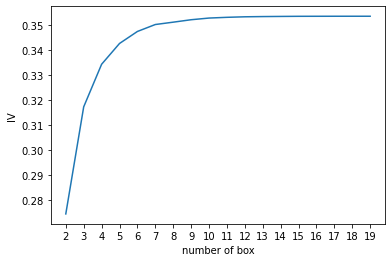

In [72]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [73]:
# 3.3.5 用最佳分箱个数分箱，并验证分箱结果
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                num_bins_[i][0],
                num_bins_[i+1][1],
                num_bins_[i][2]+num_bins_[i+1][2],
                num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [74]:
afterbins = get_bin(num_bins,6)

In [75]:
afterbins

[(21.0, 36.0, 14797, 24846),
 (36.0, 54.0, 39070, 51433),
 (54.0, 61.0, 15743, 12200),
 (61.0, 64.0, 6968, 3225),
 (64.0, 74.0, 13376, 4238),
 (74.0, 107.0, 7737, 1375)]

In [76]:
bins_df = get_woe(num_bins)

In [77]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24846,39643,0.203289,0.626744,0.151467,0.255310,-0.522108
1,36.0,54.0,39070,51433,90503,0.464099,0.568302,0.399934,0.528510,-0.278761
2,54.0,61.0,15743,12200,27943,0.143292,0.436603,0.161151,0.125364,0.251124
3,61.0,64.0,6968,3225,10193,0.052270,0.316394,0.071327,0.033139,0.766560
4,64.0,74.0,13376,4238,17614,0.090324,0.240604,0.136922,0.043548,1.145535
5,74.0,107.0,7737,1375,9112,0.046726,0.150900,0.079199,0.014129,1.723725


In [78]:
# 3.3.6 将选取最佳分箱个数的过程包装为函数
'''
自动最优分箱函数，基于卡方检验的分箱
参数：
DF: 需要输入的数据
X: 需要分箱的列名
Y: 分箱数据对应的标签 Y 列名
n: 保留分箱个数
q: 初始分箱的个数
graph: 是否要画出IV图像
区间为前开后闭 (]
'''
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue
            
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                    num_bins[i-1][0],
                    num_bins[i][1],
                    num_bins[i-1][2]+num_bins[i][2],
                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
            
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV) 
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
    return bins_df

In [79]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


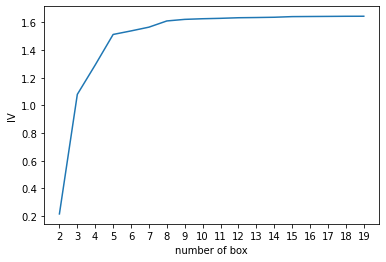

age


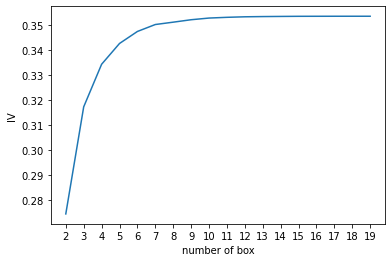

NumberOfTime30-59DaysPastDueNotWorse


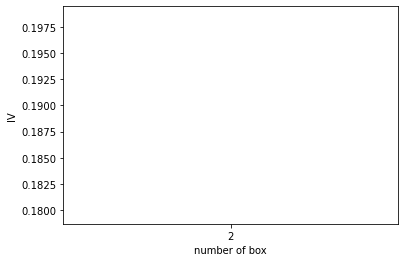

DebtRatio


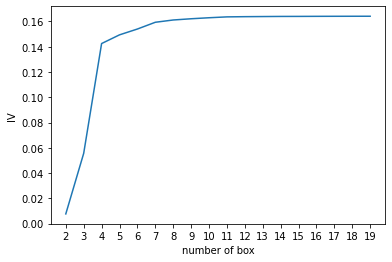

MonthlyIncome


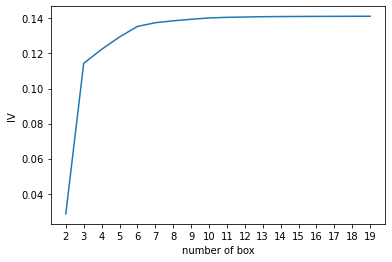

NumberOfOpenCreditLinesAndLoans


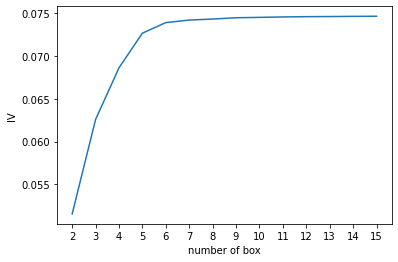

NumberOfTimes90DaysLate


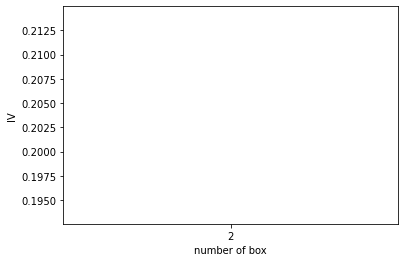

NumberRealEstateLoansOrLines


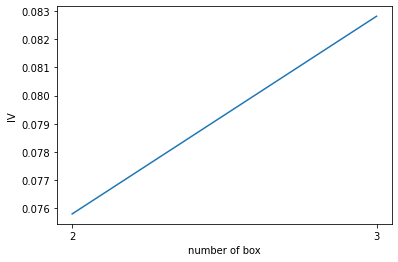

NumberOfTime60-89DaysPastDueNotWorse


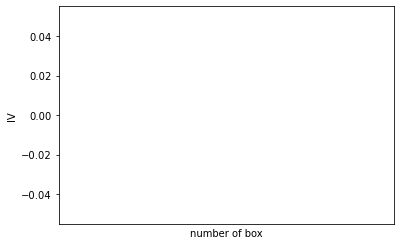

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [80]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20,graph=True)

In [81]:
# 不能自动分箱的变量自己观察然后手写
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}

In [82]:
#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}

In [83]:
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [84]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [85]:
bins_of_col = {}

In [86]:
# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                             ,"SeriousDlqin2yrs"
                             ,n=auto_col_bins[col]
                             #使用字典的性质来取出每个特征所对应的箱的数量
                             ,q=20
                             ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [87]:
#合并手动分箱数据    
bins_of_col.update(hand_bins)

In [88]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09894424338337718,
  0.298024376299956,
  0.4653543375589071,
  0.9825144902467088,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.0170495097,
  0.5034625055732768,
  1.4717734384604737,
  inf],
 'MonthlyIncome': [-inf, 0.09464469926044207, 5594.894815449431, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [89]:
# 3.4 计算各箱的WOE并映射到数据中

In [90]:
data = model_data.copy()

In [91]:
#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()

In [92]:
data

,age,SeriousDlqin2yrs
0,53,0
1,63,0
2,39,1
3,73,0
4,53,1
...,...,...
195003,32,1
195004,50,1
195005,46,1
195006,64,0


In [93]:
data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0, 74.0, np.inf])

In [94]:
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"
...,...,...,...
195003,32,1,"(-inf, 48.5]"
195004,50,1,"(48.5, 58.757]"
195005,46,1,"(-inf, 48.5]"
195006,64,0,"(58.757, 64.0]"


In [95]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut             SeriousDlqin2yrs
(-inf, 48.5]    1                   59258
                0                   39558
(48.5, 58.757]  1                   24439
                0                   23469
(58.757, 64.0]  0                   13551
                1                    8007
(64.0, 74.0]    0                   13376
                1                    4238
(74.0, inf]     0                    7737
                1                    1375
Name: SeriousDlqin2yrs, dtype: int64

In [96]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,59258
"(48.5, 58.757]",23469,24439
"(58.757, 64.0]",13551,8007
"(64.0, 74.0]",13376,4238
"(74.0, inf]",7737,1375


In [97]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

In [98]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [99]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 48.5]",39558,59258,-0.407969
"(48.5, 58.757]",23469,24439,-0.044336
"(58.757, 64.0]",13551,8007,0.522308
"(64.0, 74.0]",13376,4238,1.145535
"(74.0, inf]",7737,1375,1.723725


In [100]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [101]:
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])

In [102]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0989]     2.196858
 (0.0989, 0.298]    0.673405
 (0.298, 0.465]    -0.127371
 (0.465, 0.983]    -1.074203
 (0.983, 1.0]      -0.473839
 (1.0, inf]        -2.038972
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.522108
 (36.0, 54.0]   -0.278761
 (54.0, 61.0]    0.251124
 (61.0, 74.0]    0.998993
 (74.0, inf]     1.723725
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.017]     1.474877
 (0.017, 0.503]   -0.008684
 (0.503, 1.472]   -0.472690
 (1.472, inf]      0.175196
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.0946]        1.212443
 (0.0946, 5594.895]   -0.224964
 (5594.895, inf]       0.230629
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.859561
 (1.0, 3.0]    -0.324824
 (3.0, 5.0]    -0.051425
 (5.0, 17.0]    0.123421
 (17.0, inf]    0.462551
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352170
 (0.0, 1.0]    -0.871026
 (1.0, 2.0]    -1.379019
 (2.0, inf]    -1.541

In [103]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index) 

In [104]:
model_woe

""
0
1
2
3
4
...
195003
195004
195005
195006


In [105]:
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中
model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])

In [106]:
model_woe

,age
0,-0.278761
1,0.998993
2,-0.278761
3,0.998993
4,-0.278761
...,...
195003,-0.522108
195004,-0.278761
195005,-0.278761
195006,0.998993


In [107]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])

In [108]:
model_woe

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.278761,2.196858,-0.008684,-0.224964,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577
1,0.998993,0.673405,-0.008684,-0.224964,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577
2,-0.278761,-2.038972,-0.008684,-0.224964,-0.051425,-0.871026,-1.754896,-0.393423,-1.767781,-0.472333
3,0.998993,2.196858,-0.472690,-0.224964,0.123421,0.352170,0.236319,0.616610,0.124560,0.625577
4,-0.278761,-1.074203,-0.008684,0.230629,0.123421,0.352170,0.236319,0.616610,0.124560,-0.580294
...,...,...,...,...,...,...,...,...,...,...
195003,-0.522108,-1.074203,-0.472690,0.230629,0.123421,-1.379019,0.236319,0.194476,0.124560,-0.472333
195004,-0.278761,-1.074203,-0.008684,-0.224964,0.123421,-0.871026,0.236319,0.194476,0.124560,-0.530797
195005,-0.278761,-1.074203,-0.472690,0.230629,0.123421,0.352170,0.236319,0.194476,0.124560,-0.472333
195006,0.998993,-0.473839,-0.008684,0.230629,0.123421,0.352170,0.236319,0.394573,0.124560,0.625577


In [109]:
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"] 

In [110]:
#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.278761,2.196858,-0.008684,-0.224964,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577,0
1,0.998993,0.673405,-0.008684,-0.224964,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577,0
2,-0.278761,-2.038972,-0.008684,-0.224964,-0.051425,-0.871026,-1.754896,-0.393423,-1.767781,-0.472333,1
3,0.998993,2.196858,-0.472690,-0.224964,0.123421,0.352170,0.236319,0.616610,0.124560,0.625577,0
4,-0.278761,-1.074203,-0.008684,0.230629,0.123421,0.352170,0.236319,0.616610,0.124560,-0.580294,1


In [111]:
#3.5 建模与模型验证

In [112]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]

In [113]:
vali_woe

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.196858,0.251124,1.474877,-0.224964,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577,0
1,-1.074203,-0.278761,-0.008684,0.230629,0.123421,0.352170,0.236319,0.616610,0.124560,-0.472333,1
2,2.196858,0.998993,-0.008684,0.230629,-0.051425,0.352170,0.236319,-0.393423,0.124560,0.625577,0
3,2.196858,-0.278761,-0.008684,-0.224964,0.123421,0.352170,0.236319,0.194476,0.124560,0.625577,0
4,-1.074203,-0.278761,-0.008684,-0.224964,0.123421,0.352170,0.236319,-0.393423,0.124560,-0.580294,1
...,...,...,...,...,...,...,...,...,...,...,...
83571,-2.038972,-0.278761,0.175196,-0.224964,-0.859561,0.352170,0.236319,-0.393423,0.124560,-0.580294,1
83572,-1.074203,-0.278761,-0.008684,-0.224964,0.123421,-1.379019,0.236319,-0.393423,0.124560,-0.472333,1
83573,-1.074203,-0.278761,-0.008684,0.230629,-0.324824,0.352170,0.236319,-0.393423,0.124560,-0.472333,1
83574,-1.074203,-0.278761,-0.008684,-0.224964,-0.324824,-0.871026,-2.407176,-0.393423,0.124560,-0.472333,1


In [114]:
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [115]:
X = model_woe.iloc[:,:-1] 
y = model_woe.iloc[:,-1]
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(X,y)
lr.score(vali_X,vali_y)

0.7742174787020197

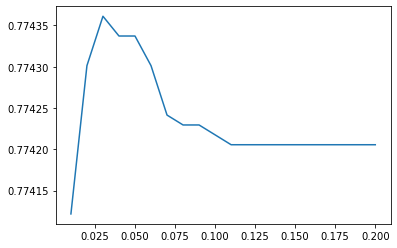

In [116]:
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)
score = []
for i in c_2: 
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot(c_2,score)
plt.show()

In [117]:
lr.n_iter_

array([5], dtype=int32)

H:\work user\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
H:\work user\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
H:\work user\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
H:\work user\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
H:\work user\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

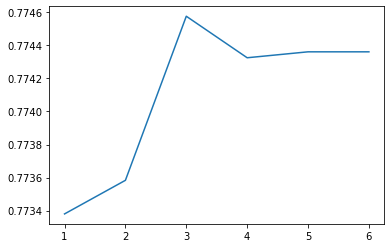

In [118]:
score = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

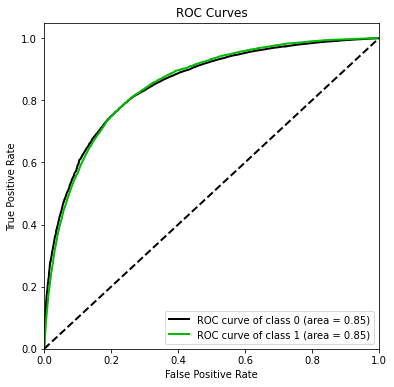

In [119]:
# ROC曲线上的结果
import scikitplot as skplt
#%%cmd
#pip install scikit-plot
vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

In [120]:
B = 20/np.log(2) 
A = 600 + B*np.log(1/60) 
B,A

(28.85390081777927, 481.8621880878296)

In [121]:
base_score = A - B*lr.intercept_
base_score

In [124]:
woeall

In [126]:
woeall["age"]

age
(-inf, 36.0]   -0.522108
(36.0, 54.0]   -0.278761
(54.0, 61.0]    0.251124
(61.0, 74.0]    0.998993
(74.0, inf]     1.723725
dtype: float64

In [122]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age
#每个箱对应的分数

cut
(-inf, 36.0]    -4.174486
(36.0, 54.0]    -2.228816
(54.0, 61.0]     2.007849
(61.0, 74.0]     7.987391
(74.0, inf]     13.781942
dtype: float64

In [125]:
file ="H:/学习小分队/机器学习/sklearn学习_jb51/【机器学习】菜菜的sklearn课堂(1-12全课)/05逻辑回归与评分卡/ScoreData.csv"
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中
with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")